## Fashion Classification

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

### 8.2 Tensorflow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2024-12-18 07:46:52.083127: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 07:46:52.099481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734508012.118227     146 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734508012.124129     146 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 07:46:52.143664: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
from tensorflow.keras.preprocessing.image import load_img

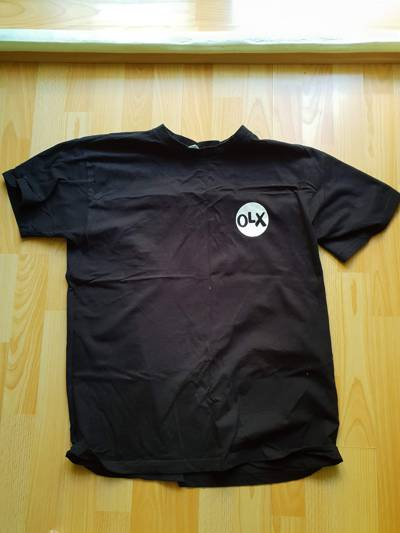

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7EFD693AFE00>


In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

In [9]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional networks

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1734508019.745141     146 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [16]:
pred = model.predict(X)

I0000 00:00:1734508022.891730     320 service.cc:148] XLA service 0x7efcac0491f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734508022.891759     320 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-18 07:47:02.926291: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734508023.232110     320 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-18 07:47:04.349930: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1734508025.162077     320 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
pred.shape

(1, 1000)

In [18]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6819637)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038139876)),
  ('n04370456', 'sweatshirt', np.float32(0.03432471)),
  ('n03710637', 'maillot', np.float32(0.011354204)),
  ('n04525038', 'velvet', np.float32(0.0018453564))]]

## 8.4 Convolutional Neural Networks

input => convolutional layers => vector representation => dense layers => prediction

## 8.5 Transfer learning 

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [21]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
)

Found 3069 images belonging to 10 classes.


In [22]:
!ls -l clothing-dataset-small/train/

total 260
drwxrwsr-x 2 jovyan jovyan 20480 Dec  4 13:38 dress
drwxrwsr-x 2 jovyan jovyan 12288 Dec  4 13:38 hat
drwxrwsr-x 2 jovyan jovyan 36864 Dec  4 13:38 longsleeve
drwxrwsr-x 2 jovyan jovyan 20480 Dec  4 13:38 outwear
drwxrwsr-x 2 jovyan jovyan 36864 Dec  4 13:38 pants
drwxrwsr-x 2 jovyan jovyan 20480 Dec  4 13:38 shirt
drwxrwsr-x 2 jovyan jovyan 20480 Dec  4 13:38 shoes
drwxrwsr-x 2 jovyan jovyan 20480 Dec  4 13:38 shorts
drwxrwsr-x 2 jovyan jovyan 12288 Dec  4 13:38 skirt
drwxrwsr-x 3 jovyan jovyan 65536 Dec  4 13:39 t-shirt


In [23]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [24]:
X, y = next(train_ds)

In [25]:
X

array([[[[-0.5529412 , -0.54509807, -0.58431375],
         [-0.8352941 , -0.827451  , -0.8666667 ],
         [-0.8117647 , -0.8039216 , -0.84313726],
         ...,
         [-0.84313726, -0.827451  , -0.8352941 ],
         [-0.8509804 , -0.8352941 , -0.84313726],
         [-0.84313726, -0.827451  , -0.8352941 ]],

        [[-0.8117647 , -0.8117647 , -0.827451  ],
         [-0.827451  , -0.827451  , -0.84313726],
         [-0.85882354, -0.85882354, -0.8745098 ],
         ...,
         [-0.827451  , -0.8117647 , -0.81960785],
         [-0.81960785, -0.8039216 , -0.8117647 ],
         [-0.8509804 , -0.8352941 , -0.84313726]],

        [[-0.84313726, -0.84313726, -0.84313726],
         [-0.8509804 , -0.8509804 , -0.8509804 ],
         [-0.85882354, -0.85882354, -0.85882354],
         ...,
         [-0.8352941 , -0.81960785, -0.827451  ],
         [-0.8352941 , -0.81960785, -0.827451  ],
         [-0.8509804 , -0.8352941 , -0.84313726]],

        ...,

        [[-0.20784312, -0.09803921, -0

In [26]:
X.shape

(32, 150, 150, 3)

In [27]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [28]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [30]:
base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [31]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [32]:
preds.shape

(32, 10)

In [33]:
preds[0]

array([-0.36115503,  0.7941792 , -0.38653505, -0.13925233,  0.22660522,
        0.48885396,  0.484375  , -0.56552523,  1.0843439 ,  0.90493023],
      dtype=float32)

In [42]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [43]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.8545 - loss: 2.6287 - val_accuracy: 0.8123 - val_loss: 1.3027
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9739 - loss: 0.0691 - val_accuracy: 0.8182 - val_loss: 1.3532
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9641 - loss: 0.1176 - val_accuracy: 0.7771 - val_loss: 1.3279
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9787 - loss: 0.0668 - val_accuracy: 0.8006 - val_loss: 1.3107
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9787 - loss: 0.0598 - val_accuracy: 0.7683 - val_loss: 1.6129
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9718 - loss: 0.0947 - val_accuracy: 0.7742 - val_loss: 1.6812
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9344 - loss: 0.2228 - val_accuracy: 0.8006 - val_loss: 1.5934
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9609 - loss: 0.1343 - val_accuracy: 0.8065 -

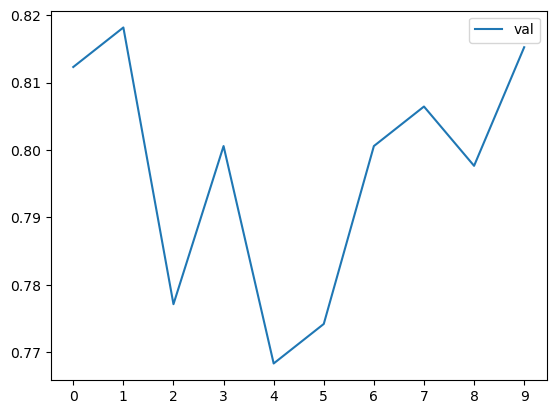

In [45]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

In [46]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3)
)

    base_model.trainable = False

    ##############################################
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [48]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print('##########################################')
    print()


0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.1796 - loss: 2.2927 - val_accuracy: 0.4633 - val_loss: 1.6808
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5200 - loss: 1.5103 - val_accuracy: 0.5982 - val_loss: 1.2914
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6281 - loss: 1.2216 - val_accuracy: 0.6598 - val_loss: 1.0996
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6890 - loss: 1.0329 - val_accuracy: 0.7009 - val_loss: 0.9833
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6998 - loss: 0.9599 - val_accuracy: 0.7361 - val_loss: 0.9048
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.7425 - loss: 0.8543 - val_accuracy: 0.7449 - val_loss: 0.8556
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.7476 - loss: 0.8026 - val_accuracy: 0.7507 - val_loss: 0.8076
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.7433 - loss: 0.7887 - val_accuracy: 0

In [52]:
del scores[0.1]
del scores[0.0001]

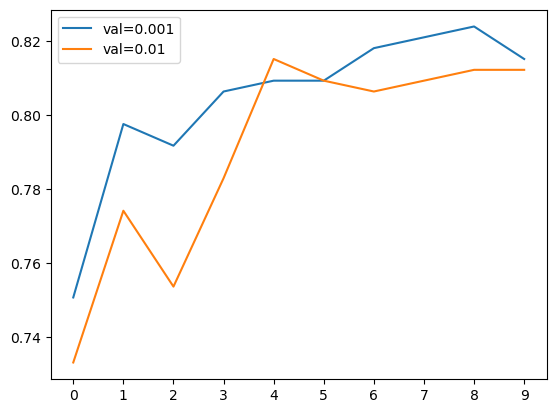

In [56]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=(f'train={lr}'))
    plt.plot(hist['val_accuracy'], label=(f'val={lr}'))
    plt.xticks(np.arange(10))
    plt.legend()

In [55]:
learning_rate = 0.001

## 8.7 Checkpointing

In [59]:
model.save_weights('model_v1.weights.h5')

In [60]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=3, val_accuracy=0.84)

'xception_v1_03_0.840.h5'

In [67]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [68]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step - accuracy: 0.4793 - loss: 1.5123 - val_accuracy: 0.7537 - val_loss: 0.7310
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7579 - loss: 0.6817 - val_accuracy: 0.7918 - val_loss: 0.6314
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8317 - loss: 0.5079 - val_accuracy: 0.8211 - val_loss: 0.5708
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8547 - loss: 0.4387 - val_accuracy: 0.8094 - val_loss: 0.5807
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8883 - loss: 0.3750 - val_accuracy: 0.8240 - val_loss: 0.5497
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9005 - loss: 0.3435 - val_accuracy: 0.8182 - val_loss: 0.5352
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9331 - loss: 0.2682 - val_accuracy: 0.8123 - val_loss: 0.5632
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9396 - loss: 0.2488 - val_accuracy: 0.8299 -